### Importing Libraries

In [269]:
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

### Getting the API and converting JSON dataframe to pandas

In [270]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

#### Sliming down the data frame

In [271]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [272]:
teams_df = pd.DataFrame(json['teams'])
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

#### Mapping the position name to id. This will help us find out the position name of a player

In [273]:
elements_df['team'] = elements_df.team.map(teams_df.set_index('id').name)

#### Mapping the team id with the team name. This will help us find out the team of a player

In [274]:
elements_df['position'] = elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

#### This is the DataFrame we will be analysing

In [275]:
df = elements_df[['id','web_name','first_name','second_name','element_type','team','team_code','form','now_cost','selected_by_percent','total_points','points_per_game',
       'bonus','ict_index','ict_index_rank','position']]

In [276]:
df.head(10)

,id,web_name,first_name,second_name,element_type,team,team_code,form,now_cost,selected_by_percent,total_points,points_per_game,bonus,ict_index,ict_index_rank,position
0,1,Özil,Mesut,Özil,3,Arsenal,3,0.0,67,0.5,0,0.0,0,0.0,688,Midfielder
1,2,Sokratis,Sokratis,Papastathopoulos,2,Arsenal,3,0.0,48,0.1,0,0.0,0,0.0,655,Defender
2,3,David Luiz,David,Luiz Moreira Marinho,2,Arsenal,3,0.8,54,0.8,40,2.1,0,41.0,283,Defender
3,4,Aubameyang,Pierre-Emerick,Aubameyang,3,Arsenal,3,1.0,113,8.8,108,4.3,10,144.9,46,Midfielder
4,5,Cédric,Cédric,Soares,2,Arsenal,3,0.5,46,0.4,28,2.8,3,29.2,328,Defender
5,6,Lacazette,Alexandre,Lacazette,4,Arsenal,3,5.2,83,7.1,111,4.3,18,152.8,36,Forward
6,7,Mustafi,Shkodran,Mustafi,2,Arsenal,3,0.0,50,0.0,3,1.0,0,1.3,473,Defender
7,8,Leno,Bernd,Leno,1,Arsenal,3,1.2,50,7.1,104,3.6,8,59.8,215,Goalkeeper
8,9,Xhaka,Granit,Xhaka,3,Arsenal,3,0.8,52,0.4,57,2.3,1,72.4,171,Midfielder
9,10,Marí,Pablo,Marí,2,Arsenal,3,0.2,44,0.1,21,3.0,1,15.9,370,Defender


#### getting rid of null values 

In [277]:
df.dropna(axis=0, inplace=True)

<ipython-input-277-0bb169f49cd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [278]:
df


,id,web_name,first_name,second_name,element_type,team,team_code,form,now_cost,selected_by_percent,total_points,points_per_game,bonus,ict_index,ict_index_rank,position
0,1,Özil,Mesut,Özil,3,Arsenal,3,0.0,67,0.5,0,0.0,0,0.0,688,Midfielder
1,2,Sokratis,Sokratis,Papastathopoulos,2,Arsenal,3,0.0,48,0.1,0,0.0,0,0.0,655,Defender
2,3,David Luiz,David,Luiz Moreira Marinho,2,Arsenal,3,0.8,54,0.8,40,2.1,0,41.0,283,Defender
3,4,Aubameyang,Pierre-Emerick,Aubameyang,3,Arsenal,3,1.0,113,8.8,108,4.3,10,144.9,46,Midfielder
4,5,Cédric,Cédric,Soares,2,Arsenal,3,0.5,46,0.4,28,2.8,3,29.2,328,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,617,Söndergaard,Andreas,Söndergaard,1,Wolves,39,0.0,40,0.3,0,0.0,0,0.0,546,Goalkeeper
684,626,Cutrone,Patrick,Cutrone,4,Wolves,39,0.0,59,0.0,2,1.0,0,0.2,493,Forward
685,629,Lonwijk,Nigel,Lonwijk,2,Wolves,39,0.0,40,0.0,0,0.0,0,0.0,550,Defender
686,642,Willian José,Willian José,Da Silva,4,Wolves,39,2.0,68,0.2,24,2.2,0,35.8,301,Forward


### Analysing the data

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='element_type', ylabel='id'>,
        <AxesSubplot:xlabel='team_code', ylabel='id'>,
        <AxesSubplot:xlabel='now_cost', ylabel='id'>,
        <AxesSubplot:xlabel='total_points', ylabel='id'>,
        <AxesSubplot:xlabel='bonus', ylabel='id'>,
        <AxesSubplot:xlabel='ict_index_rank', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='element_type'>,
        <AxesSubplot:xlabel='element_type', ylabel='element_type'>,
        <AxesSubplot:xlabel='team_code', ylabel='element_type'>,
        <AxesSubplot:xlabel='now_cost', ylabel='element_type'>,
        <AxesSubplot:xlabel='total_points', ylabel='element_type'>,
        <AxesSubplot:xlabel='bonus', ylabel='element_type'>,
        <AxesSubplot:xlabel='ict_index_rank', ylabel='element_type'>],
       [<AxesSubplot:xlabel='id', ylabel='team_code'>,
        <AxesSubplot:xlabel='element_type', ylabel='team_code'>,
        <AxesSubplot:xlabel='team_code',

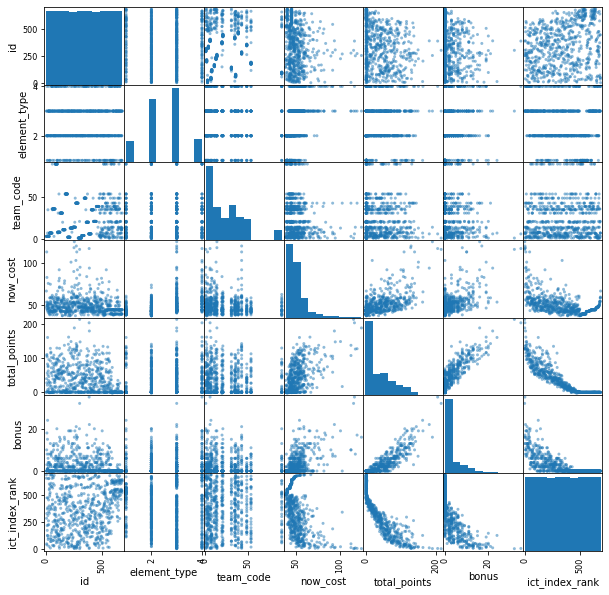

In [279]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))

#### After looking at the coorelation between different columns we decided to focus on building a team based on total point scored and cost

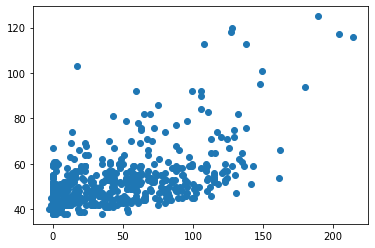

In [280]:
plt.scatter(df['total_points'], df['now_cost'])

#### Now we need to find which position gets us the max points

<BarContainer object of 4 artists>

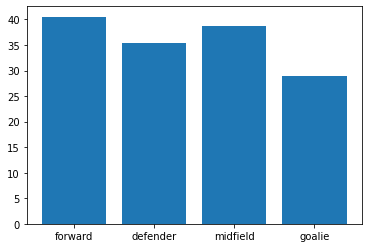

In [281]:
fwd_df = df.loc[df.position == 'Forward']
def_df = df.loc[df.position == 'Defender']
mid_df = df.loc[df.position == 'Midfielder']
gk_df = df.loc[df.position == 'Goalkeeper']

fwd_df_total = fwd_df.total_points.mean()
def_df_total = def_df.total_points.mean()
mid_df_total = mid_df.total_points.mean()
gk_df_total = gk_df.total_points.mean()

plt.bar(["forward", "defender", "midfield", "goalie"],[fwd_df_total,def_df_total,mid_df_total,gk_df_total])

#### From the above plot we can see that forward and midfielders get us the most points. 

#### Sliming down the dataset more. This is the DataFrame we will be using to make our dream team

In [282]:
data = df[["web_name","total_points", "team", "team_code","element_type","now_cost","ict_index_rank","position"]]
#data = data.sort_values(by=['ict_index_rank'] inplace= True, ascending=True)

In [283]:
data

,web_name,total_points,team,team_code,element_type,now_cost,ict_index_rank,position
0,Özil,0,Arsenal,3,3,67,688,Midfielder
1,Sokratis,0,Arsenal,3,2,48,655,Defender
2,David Luiz,40,Arsenal,3,2,54,283,Defender
3,Aubameyang,108,Arsenal,3,3,113,46,Midfielder
4,Cédric,28,Arsenal,3,2,46,328,Defender
...,...,...,...,...,...,...,...,...
683,Söndergaard,0,Wolves,39,1,40,546,Goalkeeper
684,Cutrone,2,Wolves,39,4,59,493,Forward
685,Lonwijk,0,Wolves,39,2,40,550,Defender
686,Willian José,24,Wolves,39,4,68,301,Forward


In [284]:
expected_scores = data["total_points"]  # total points from last season
prices = data["now_cost"] / 10
positions = data["element_type"]
clubs = data["team_code"]
position = data["position"]
names = data["web_name"]
team = data["team"]
#fName = data["first_name" + "second_name"]
rank = data["ict_index_rank"]
#rank.sort_values(ascending=False)
decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values, rank.values)


/opt/anaconda3/lib/python3.8/site-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 2273.7


### PuLP is a linear programming library in python. It allows you to write down an objective function and constraints in a very intuitive way and instantly solve them.

In [285]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [286]:
import pulp

In [287]:
def select_team(expected_scores, prices, positions, clubs, rank, total_budget=100, sub_factor=0.7):
    num_players = len(expected_scores)
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    


    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + sub_decisions[i]*sub_factor) * expected_scores[i]
                 for i in range(num_players)), "Objective"

    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost
    
    #ict constraint
    #model += sum((decisions[i])* 1/rank[i] for i in range(665, 668)) 
                
    
    # position constraints
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2

    # 3-4 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) <= 4
    # 4 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 4

    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5

    # 1-4 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) <= 4
    # 4 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 4

    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players

    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team

    model.solve()
    print("Total expected score = {}".format(model.objective.value()))

    return decisions, captain_decisions, sub_decisions,

#### As you can see in the above code. No. of midfielders and forwards are higher in number than defenders. This is because when we analysed the data we found out that these positions get us more points. 

In [288]:
decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values, rank.values)
# print results
for i in range(data.shape[0]):
    if decisions[i].value() != 0:
        display(Markdown("**{}** Position = {}, Team = {}, Expected_Score= {}, Price = {}".format(names[i], position[i], team[i], expected_scores[i], prices[i])))
print()
print("Subs:")
# print results
for i in range(data.shape[0]):
    if sub_decisions[i].value() == 1:
        display(Markdown("**{}** Position = {}, Team = {}, Expected_Score= {}, Price = {}".format(names[i], position[i], team[i], expected_scores[i], prices[i])))

print()
print("Captain:")
# print results
for i in range(data.shape[0]):
    if captain_decisions[i].value() == 1:
        display(Markdown("**{}** Position = {}, Team = {}, Expected_Score= {}, Price = {}".format(names[i], position[i], team[i], expected_scores[i], prices[i])))


Total expected score = 2273.7


**Martínez** Position = Goalkeeper, Team = Aston Villa, Expected_Score= 161, Price = 5.4

**Watkins** Position = Forward, Team = Aston Villa, Expected_Score= 135, Price = 6.5

**Dallas** Position = Defender, Team = Leeds, Expected_Score= 141, Price = 5.1

**Bamford** Position = Forward, Team = Leeds, Expected_Score= 162, Price = 6.6

**Gündogan** Position = Midfielder, Team = Man City, Expected_Score= 143, Price = 5.9

**Stones** Position = Defender, Team = Man City, Expected_Score= 123, Price = 5.2

**Fernandes** Position = Midfielder, Team = Man Utd, Expected_Score= 214, Price = 11.6

**Kane** Position = Forward, Team = Spurs, Expected_Score= 204, Price = 11.7

**Son** Position = Midfielder, Team = Spurs, Expected_Score= 180, Price = 9.4

**Cresswell** Position = Defender, Team = West Ham, Expected_Score= 136, Price = 5.9

**Neto** Position = Midfielder, Team = Wolves, Expected_Score= 124, Price = 5.7


Subs:


**Targett** Position = Defender, Team = Aston Villa, Expected_Score= 118, Price = 5.1

**Meslier** Position = Goalkeeper, Team = Leeds, Expected_Score= 131, Price = 4.7

**Adams** Position = Forward, Team = Southampton, Expected_Score= 109, Price = 5.8

**Soucek** Position = Midfielder, Team = West Ham, Expected_Score= 123, Price = 5.3


Captain:


**Fernandes** Position = Midfielder, Team = Man Utd, Expected_Score= 214, Price = 11.6